This project will focus on analysis of where crimes happen in Chicago and how they are affected by various factors. The client(s) can include law<br> enforcement, the government, or the residents of Chicago. <br>
<br>It's important to know the pattern of crimes in the city and how they are affected by other factors. For law enforcement, they would be able to allocate <br>
their limited resources more effectively by sending officers to where they are likely needed the most. While crime pattern analysis is useful, the factors <br>
that contribute/affect where and what kind of crimes happen are important as well. These factors can include but not limited to: weather, income level, <br>
time of the day, public transit, poverty levels, unemployment, school closings, and demographics. If there is a correlation between crimes and one or <br>
more of these factors, actions can be taken to mitigate the situation if possible. With regards to local residents, the analysis can be useful for them <br>
to avoid certain areas during a certain time period especially when public transit stops are invovled. <br>
<br>Various data files will be used to help aid the analysis including the main crime data set from city of Chicago data portal. This data set contains <br>
<b><a href="https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2">crime data</a></b> collected over the course of 16
years between 2001 and 2016 and can be downloaded as a single csv file. The <b><a href="https://www.ncdc.noaa.gov/cdo-web/">weather data</a></b><br>is collected from NOAA website also between 2001 and 2016. The data is split into two halves because NOAA only allows a certain amount <br> information to be downloaded at a time. The file has daily summaries where things like temperature, precipitation, snow, date and coordinates are included.<br> To explore other factors, I also downloaded the following data sets to aid the analysis: <br>
<b>School closing data</b> from: <a href="https://wbez-assets.s3.amazonaws.com/WBEZ-Graphics/SchoolChart.html"> school closing data </a> <br>
<b>Unemployment data</b> from: <a href="http://www.ides.illinois.gov/LMI/Pages/Historical_Monthly_Annual_Data.aspx"> unemployment data </a><br>
<b>Chicago L transit stops</b> from: <a href="https://data.cityofchicago.org/Transportation/CTA-System-Information-List-of-L-Stops/8pix-ypme"> L stops data </a><br>
Census data from 2010 census from US Census Buerau and they include: <br>
<b>Education, income, poverty levels, and race</b> data broken down by community in Chicago. They are downloaded from the following link: <a href="http://robparal.blogspot.com/2012/05/hard-to-find-census-data-on-chicago.html?m=1"> Chicago census data </a> <br>
These data files are collected either as csv files or plain html text. The html text is converted to csv in Excel. With all the data files collected, I can then <br>
begin my data cleaning and analysis in the following sections.

<h3>Data merging, cleaning and wrangling</h3>

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gmaps                                #used for plotting data on google maps using an API
import gmaps.datasets
import os
from matplotlib import cm
import ipywidgets as widgets
import json
%config InlineBackend.figure_format = 'svg'
plt.style.use('seaborn')
pd.set_option('display.width', 500)
#plt.rcParams['figure.dpi']= 150
pd.set_option('max_columns', 60)

In [2]:
#Since there are two weather data files, I first merged them into 1 file
weather1=pd.read_csv('data/Crime/weather1.csv')
weather2=pd.read_csv('data/Crime/weather2.csv')
#Check to see if they have the same shape
print(weather1.shape, weather2.shape)

(3652, 34) (2515, 30)


In [3]:
#Looks like the second file has less columns. Let's take a look at both files and see what we can drop
weather1.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,TSUN,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03,WV20
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,15.0,24,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,18.0,28,7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,25.0,30,19,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,29.0,36,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather2.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,WT05,WT06,WT08,WT09,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-01,0.0,0.0,0.0,NaN,41.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-02,0.0,0.0,0.0,NaN,24.0,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-03,0.0,0.0,0.0,NaN,36.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-04,0.0,0.0,0.0,NaN,30.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2011-01-05,0.0,0.0,0.0,NaN,31.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


The WT columns are weather types and they are denoted by numbers from 01 to 19 and 21 and 22 (in the column names). Each is a difference weather <br>
type. The WV is weather in the vicinity. It can have five values: 01, 03, 07, 18 and 20. In those columns, 1.0 means that's the weather type of that day and <br>
nan means not that weather type. We can consolidate all those WT columns into one column 'weather type' and assign a value to represent the weather <br>
type of that day according to the number in its column names. A dictionary can be constructed to map the value to a weather type as a string. We will drop <br>
the WV columns as they are irrelavant for the analysis.

In [5]:
#Contruct a dictionary to map WT values to actual weather types according to NOAA documentation
weather_type={'WT01': 'Fog, ice fog, or freezing fog', 'WT02': 'Heavy fog or freezing fog', 'WT03': 'Thunder', 'WT04': 'Ice pellets, sleet, snow pellets, or small hail',
                            'WT05': 'Hail', 'WT06': 'Glaze or rime', 'WT07': 'Dust, blowing dust, or blowing obstruction', 'WT08': 'Smoke or haze', 
                            'WT09': 'Blowing or drifting snow',  'WT10': 'Tornado, waterspout, or funnel cloud', 'WT11': 'High or damaging winds', 'WT12': 'Blowing spray', 
                            'WT13': 'Mist', 'WT14': 'Drizzle', 'WT15': 'Freezing drizzle', 'WT16': 'Rain', 'WT17': 'Freezing rain', 
                            'WT18': 'Snow, snow pellets, snow grains, or ice crystals', 'WT19': 'Unknown source of precipitation', 
                            'WT20': 'Rain or snow shower', 'WT21': 'Ground fog', 'WT22': 'Ice fog or freezing fog'}

#First drop WV columns and then slice the WT columns into a new data frame
weather1.drop(['WV03', 'WV20'], axis=1, inplace=True)
weather1_wt=weather1.iloc[:, 13:34]
weather2_wt=weather2.iloc[:,12:30 ]

#Write a function to return a list with all weather types
def extract_weather_type(weather_types):
    """This function take a data frame as an argument and returns all weather types for each row in a list"""    
    weather_type_list=[]
    for i in range(len(weather_types)):
        type_per_row=[]
        for k, n in enumerate(weather_types.columns):
            if weather_types.iloc[i, k]==1.0:
                type_per_row.append(n)
        if len(type_per_row)==0:
            weather_type_list.append('Unknown')
        else:
            weather_type_list.append([weather_type[x] for x in type_per_row])
    return(weather_type_list)

#Now convert all the weather types of the two weather data sets into one single list
weather_list1=extract_weather_type(weather1_wt)
weather_list2=extract_weather_type(weather2_wt)

#Now drop all WT columns in original data sets and then add a new column named "weather_type"
weather1.drop(weather1_wt.columns, axis=1, inplace=True)
weather2.drop(weather2_wt.columns, axis=1, inplace=True)

#Add a new column to each data frame
weather1['weather_type']=weather_list1
weather2['weather_type']=weather_list2

#Drop TSUN (total sunshine) column of the first data frame since it's not present in data frame 2.
weather1.drop('TSUN', axis=1, inplace=True)

#Now the two data frame should contain the same columns, we can combine them into 1 data frame
weather=weather1.append(weather2)
weather.reset_index(inplace=True)
weather.head()

,index,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,0,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,15.0,24.0,5.0,Unknown
1,1,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown
2,2,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,18.0,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn..."
3,3,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,25.0,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,..."
4,4,USW00094846,"CHICAGO OHARE INTERNATIONAL AIRPORT, IL US",41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,29.0,36.0,21.0,[Smoke or haze]


In [6]:
#Check the new data frame
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            3365 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


In [7]:
t_ave=(weather.TMAX+weather.TMIN)/2
weather['TAVG']=t_ave
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6166 non-null float64
SNOW            6165 non-null float64
SNWD            6134 non-null float64
TAVG            6166 non-null float64
TMAX            6166 non-null float64
TMIN            6166 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


The 'PRCP' column has 1 null value, the 'SNOW' column has 2 null values, the 'SNWD' column has 33 null values, and all the temperature columns have <br>
1 null value. For precipitation values we will fill with 0 but for temperatures we will fill these missing values with forward fill.

Looks good but the TAVG has some null values. Since TAVG=(TMAX+TMIN)/2, we can recalculate all the average temperatures and recontruct the column

In [8]:
weather.loc[:, 'PRCP':'SNWD']=weather.loc[:, 'PRCP':'SNWD'].fillna(value=0)
weather.loc[:, 'TAVG': 'TMIN']=weather.loc[:, 'TAVG': 'TMIN'].fillna(method='ffill')
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 14 columns):
index           6167 non-null int64
STATION         6167 non-null object
NAME            6167 non-null object
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null object
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
dtypes: float64(9), int64(1), object(4)
memory usage: 674.6+ KB


Now we have a complete weather data frame to work with. Since all the stations and names are the same, we can discard those two columns as well

In [9]:
weather.drop(['STATION', 'NAME'], axis=1, inplace=True)

Next, let's convert the 'DATE' column to a datetime object and we can then use it to merge to the crime data set

In [10]:
weather['DATE']=pd.to_datetime(weather['DATE'])
weather['date']=weather['DATE'].astype(str)
weather.info()
weather.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6167 entries, 0 to 6166
Data columns (total 13 columns):
index           6167 non-null int64
LATITUDE        6167 non-null float64
LONGITUDE       6167 non-null float64
ELEVATION       6167 non-null float64
DATE            6167 non-null datetime64[ns]
PRCP            6167 non-null float64
SNOW            6167 non-null float64
SNWD            6167 non-null float64
TAVG            6167 non-null float64
TMAX            6167 non-null float64
TMIN            6167 non-null float64
weather_type    6167 non-null object
date            6167 non-null object
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 626.4+ KB


,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type,date
0,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown,2001-01-01
1,1,41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown,2001-01-02
2,2,41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,17.5,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn...",2001-01-03
3,3,41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,24.5,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,...",2001-01-04
4,4,41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,28.5,36.0,21.0,[Smoke or haze],2001-01-05


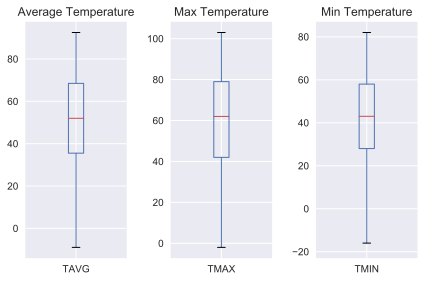

In [11]:
#Check to see how the numerica data look
descrp=['Average Temperature', 'Max Temperature', 'Min Temperature']
fig, axes=plt.subplots(nrows=1, ncols=3)
for k,n in enumerate(['TAVG', 'TMAX', 'TMIN']):
    weather[n].plot(kind='box', ax=axes.flat[k], title=descrp[k])
plt.tight_layout()   
plt.show()

In [11]:
weather.to_csv('data/crime/weather.csv')

Now we are going to import the crime data. This is a farily large data set and after we import it and clean it, we can break it down by years. We first load <br>
1000 rows to check the data.

In [13]:
crime_1k=pd.read_csv('data/crime/crimes_chi.csv', nrows=1000)
crime_1k.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24,40,1,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8,15,66,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7,20,68,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,03/21/2006 04:45:00 PM,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11,26,23,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,03/21/2006 10:00:00 PM,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6,8,44,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


We need to convert the date to a timestamp for easy manipulation and also merging with weather data. Let's read in the file into a data frame.

In [2]:
crimes=pd.read_csv('data/crime/crimes_chi.csv', parse_dates=True)

Let's check this data set and see if there are missing values or outliers.

In [3]:
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478356 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6478356 non-null int64
Case Number             6478352 non-null object
Date                    6478356 non-null object
Block                   6478356 non-null object
IUCR                    6478356 non-null object
Primary Type            6478356 non-null object
Description             6478356 non-null object
Location Description    6475409 non-null object
Arrest                  6478356 non-null bool
Domestic                6478356 non-null bool
Beat                    6478356 non-null int64
District                6478307 non-null float64
Ward                    5863502 non-null float64
Community Area          5862326 non-null float64
FBI Code                6478356 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6478356 non-null int64
Updated On              6

The 'Ward' and 'Community Area' have a lot of missing values but they could be useful for building models to predict crimes. We will save two versions <br>
of this data frame. One with missing values of 'Ward' and 'Community' for EDA and one without all the missing values for maching learning purposes.

In [6]:
crimes_all=crimes[~crimes['Latitude'].isnull()]

In [8]:
crimes_all.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6391699 entries, 0 to 6478355
Data columns (total 22 columns):
ID                      6391699 non-null int64
Case Number             6391696 non-null object
Date                    6391699 non-null object
Block                   6391699 non-null object
IUCR                    6391699 non-null object
Primary Type            6391699 non-null object
Description             6391699 non-null object
Location Description    6389660 non-null object
Arrest                  6391699 non-null bool
Domestic                6391699 non-null bool
Beat                    6391699 non-null int64
District                6391650 non-null float64
Ward                    5786097 non-null float64
Community Area          5785024 non-null float64
FBI Code                6391699 non-null object
X Coordinate            6391699 non-null float64
Y Coordinate            6391699 non-null float64
Year                    6391699 non-null int64
Updated On              6

In [9]:
#Save crimes_all as csv
crimes_all.to_csv('data/crime/crimes_all.csv')

In [10]:
#We will load the file when we need to. Delete for now.
del crimes_all

In [11]:
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,4647369,HM155213,01/31/2006 12:13:05 PM,066XX N BOSWORTH AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,"SCHOOL, PUBLIC, BUILDING",True,False,2432,24.0,40.0,1.0,18,1164737.0,1944193.0,2006,04/15/2016 08:55:02 AM,42.002478,-87.669297,"(42.002478396, -87.66929687)"
1,4647370,HM245080,03/21/2006 07:00:00 PM,062XX S WESTERN AVE,1330,CRIMINAL TRESPASS,TO LAND,PARKING LOT/GARAGE(NON.RESID.),True,False,825,8.0,15.0,66.0,26,1161441.0,1863309.0,2006,04/15/2016 08:55:02 AM,41.780595,-87.683676,"(41.780595495, -87.68367553)"
2,4647372,HM171175,02/09/2006 01:44:41 AM,058XX S SHIELDS AVE,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,711,7.0,20.0,68.0,18,1174958.0,1866097.0,2006,04/15/2016 08:55:02 AM,41.787955,-87.634037,"(41.787955143, -87.634036744)"
3,4647373,HM244805,03/21/2006 04:45:00 PM,011XX N SPAULDING AVE,0810,THEFT,OVER $500,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1121,11.0,26.0,23.0,06,1154100.0,1907414.0,2006,04/15/2016 08:55:02 AM,41.901774,-87.709415,"(41.901774026, -87.709414574)"
4,4647374,HM245851,03/21/2006 10:00:00 PM,080XX S DOBSON AVE,0820,THEFT,$500 AND UNDER,STREET,False,False,631,6.0,8.0,44.0,06,1184622.0,1851863.0,2006,04/15/2016 08:55:02 AM,41.748675,-87.599049,"(41.748674558, -87.599048654)"


First drop the 'Ward' and 'Community Area' columns then drop all null rows especially when latitude and longitude information is missing

In [12]:
crimes.drop(['Ward', 'Community Area'], axis=1, inplace=True)
crimes.dropna(inplace=True)

In [13]:
#Check to see if the data frame now does not have any missing values
crimes.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6389608 entries, 0 to 6478355
Data columns (total 20 columns):
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null object
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389608 non-null float64
Longitude               63

In [16]:
Date=pd.to_datetime(crimes['Date'])
crimes.index=Date
crimes.sort_index(inplace=True)

Now I am going to merge with the weather data to use for further analysis

In [21]:
#First create a date columns to link to weather data
crimes['date']=crimes['Date'].dt.date
crimes['date']=crimes['date'].astype(str)
crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01
2001-01-01,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01
2001-01-01,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01
2001-01-01,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01
2001-01-01,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01


Now the 'date' column can be used to merge with weather data

In [22]:
weather.head()

,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type,date
0,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown,2001-01-01
1,1,41.995,-87.9336,201.8,2001-01-02,0.0,0.0,15.0,12.0,19.0,5.0,Unknown,2001-01-02
2,2,41.995,-87.9336,201.8,2001-01-03,0.0,0.0,14.0,17.5,28.0,7.0,"[Fog, ice fog, or freezing fog, Mist, Snow, sn...",2001-01-03
3,3,41.995,-87.9336,201.8,2001-01-04,0.0,0.0,14.0,24.5,30.0,19.0,"[Fog, ice fog, or freezing fog, Smoke or haze,...",2001-01-04
4,4,41.995,-87.9336,201.8,2001-01-05,0.0,0.0,13.0,28.5,36.0,21.0,[Smoke or haze],2001-01-05


In [23]:
pd.merge(crimes, weather, on='date', how='left').head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
0,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
1,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
3,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
4,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


In [24]:
#merge the two data frames into one new data frame for analysis
crimes_wea=pd.merge(crimes, weather, on='date', how='left')
crimes_wea.tail()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
6389603,11147510,JA509544,2017-11-12 23:30:00,057XX W LAKE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,True,True,1512,15.0,08B,1138028.0,1902221.0,2017,11/19/2017 03:51:13 PM,41.887829,-87.768575,"(41.887829366, -87.768575322)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389604,11149104,JA511655,2017-11-12 23:30:00,022XX W CHARLESTON ST,0820,THEFT,$500 AND UNDER,STREET,False,False,1432,14.0,06,1161186.0,1914084.0,2017,11/19/2017 03:51:13 PM,41.919933,-87.683201,"(41.919932633, -87.683201087)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389605,11147551,JA509596,2017-11-12 23:30:00,047XX N ASHLAND AVE,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE-GARAGE,False,False,1912,19.0,05,1164804.0,1931504.0,2017,11/19/2017 03:51:13 PM,41.967658,-87.669412,"(41.967657963, -87.669412246)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389606,11147517,JA509554,2017-11-12 23:32:00,081XX S CORNELL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,True,411,4.0,14,1188677.0,1851516.0,2017,11/19/2017 03:51:13 PM,41.747626,-87.584201,"(41.747626436, -87.584200954)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."
6389607,11147527,JA509559,2017-11-12 23:45:00,118XX S MORGAN ST,0560,ASSAULT,SIMPLE,RESIDENCE,False,True,524,5.0,08A,1171790.0,1826339.0,2017,11/19/2017 03:51:13 PM,41.678924,-87.646815,"(41.678923809, -87.646815265)",2017-11-12,2507,41.995,-87.9336,201.8,2017-11-12,0.13,0.0,0.0,38.0,40.0,36.0,"[Fog, ice fog, or freezing fog, Ice pellets, s..."


We can then save the new data frame as a csv file for future analysis. In the following sections, I will use other data sets and this new data with weather <br>
information to do some exploratory analysis

In [27]:
#Write to a CSV file for following processing
crimes_wea.to_csv('data/crime/crimes_weather.csv')

In [2]:
#12-15-17 Continue. We will try some visulizations this time.

In [2]:
crime_wea=pd.read_csv('data/crime/crimes_weather.csv')

In [3]:
#The 'Arrest' column and 'Domestic' column contain boolean like data but they are strings. Let's convert them to bool type
crime_wea.loc[:, ['Arrest', 'Domestic']]=crime_wea.loc[:, ['Arrest', 'Domestic']].astype('bool')

In [4]:
crime_wea.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6389608 entries, 0 to 6389607
Data columns (total 34 columns):
Unnamed: 0              6389608 non-null int64
ID                      6389608 non-null int64
Case Number             6389608 non-null object
Date                    6389608 non-null object
Block                   6389608 non-null object
IUCR                    6389608 non-null object
Primary Type            6389608 non-null object
Description             6389608 non-null object
Location Description    6389608 non-null object
Arrest                  6389608 non-null bool
Domestic                6389608 non-null bool
Beat                    6389608 non-null int64
District                6389608 non-null float64
FBI Code                6389608 non-null object
X Coordinate            6389608 non-null float64
Y Coordinate            6389608 non-null float64
Year                    6389608 non-null int64
Updated On              6389608 non-null object
Latitude                6389

In [4]:
crime_wea['Date']=pd.to_datetime(crime_wea['Date'])
crime_wea.index=crime_wea['Date']

In [6]:
crime_wea.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,date,index,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,SNOW,SNWD,TAVG,TMAX,TMIN,weather_type
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2001-01-01,0,3272413,HK299011,2001-01-01,076XX S EMERALD AVE,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,621,6.0,06,1172658.0,1854465.0,2001,03/31/2006 10:03:38 PM,41.756087,-87.642812,"(41.756086589, -87.642812325)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,1,5508664,HN320275,2001-01-01,009XX N HARDING AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,False,True,1112,11.0,02,1149843.0,1906023.0,2001,06/11/2007 03:52:33 PM,41.898041,-87.725087,"(41.898040875, -87.725087394)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,2,2743135,HJ380339,2001-01-01,039XX N MOZART ST,0266,CRIM SEXUAL ASSAULT,PREDATORY,APARTMENT,True,False,1733,17.0,02,1156711.0,1926359.0,2001,08/17/2015 03:03:40 PM,41.953708,-87.699309,"(41.953708013, -87.699309457)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,3,2126730,HH368190,2001-01-01,060XX W ARDMORE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,CHURCH/SYNAGOGUE/PLACE OF WORSHIP,False,False,1622,16.0,02,1135010.0,1938218.0,2001,08/17/2015 03:03:40 PM,41.986663,-87.778803,"(41.986663058, -87.778803492)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,4,1316070,G007383,2001-01-01,041XX W 24 PL,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1013,10.0,26,1149237.0,1887440.0,2001,08/17/2015 03:03:40 PM,41.847059,-87.727795,"(41.84705874, -87.7277947)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,5,1313893,G000035,2001-01-01,027XX W NELSON ST,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,1411,14.0,14,1157359.0,1920111.0,2001,08/17/2015 03:03:40 PM,41.936550,-87.697098,"(41.936549915, -87.697097823)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,6,1309913,G000355,2001-01-01,026XX S INDIANA AV,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,False,2112,2.0,14,1178078.0,1886818.0,2001,08/17/2015 03:03:40 PM,41.844745,-87.621968,"(41.844745115, -87.621968071)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,7,1780042,G600951,2001-01-01,105XX S PARNELL AV,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,2233,22.0,26,1174535.0,1835045.0,2001,08/17/2015 03:03:40 PM,41.702754,-87.636510,"(41.702753949, -87.636509707)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown
2001-01-01,8,1329588,G025242,2001-01-01,061XX S COTTAGE GROVE AV,0820,THEFT,$500 AND UNDER,STREET,False,False,313,3.0,06,1182574.0,1864705.0,2001,08/17/2015 03:03:40 PM,41.783962,-87.606155,"(41.783961993, -87.606155349)",2001-01-01,0,41.995,-87.9336,201.8,2001-01-01,0.0,0.0,17.0,14.5,24.0,5.0,Unknown


<strong>Now import and wrangle the census data tables. </strong>

In [3]:
poverty=pd.read_csv('data/crime/final_poverty.csv')

In [4]:
poverty.head(10)

,Poverty for Individuals in Chicago Community Areas,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
1,1. Rogers Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Total,"58,993","52,781","57,172","60,962","55,080","54,455","52,115","51,270"
3,Income below poverty level,"4,924","8,363","11,174","12,993","14,833","15,065","14,173","13,487"
4,Percent income below poverty level,8.3%,15.8%,19.5%,21.3%,26.9%,27.7%,27.2%,26.0%
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2. West Ridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,"64,623","59,994","64,069","72,010","72,693","72,306","71,941","71,100"
8,Income below poverty level,"2,890","3,463","8,124","10,314","14,484","15,050","13,757","15,690"
9,Percent income below poverty level,4.5%,5.8%,12.7%,14.3%,19.9%,20.8%,19.1%,22.0%


In [5]:
poverty.drop([391, 392, 393, 394, 395, 396, 397], inplace=True)

In [6]:
poverty.tail(10)

,Poverty for Individuals in Chicago Community Areas,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
381,77. Edgewater,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
382,Total,"59,969","57,091","59,580","60,511","52,996","52,925","52,551","52,011"
383,Income below poverty level,"5,339","8,642","10,078","10,330","9,882","9,422","9,652","9,532"
384,Percent income below poverty level,8.9%,15.1%,16.9%,17.1%,18.6%,17.8%,18.4%,18.0%
385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,Chicago,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
387,Total,"3,327,145","2,965,648","2,739,439","2,839,038","2,655,432","2,656,947","2,660,712","2,663,479"
388,Income below poverty level,"483,487","601,410","592,298","556,791","587,807","601,378","604,568","594,751"
389,Percent income below poverty level,14.5%,20.3%,21.6%,19.6%,22.1%,22.6%,22.7%,22.0%
390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
poverty.drop([386, 387, 388, 389, 390], inplace=True)

In [8]:
poverty.drop(385, inplace=True)

In [9]:
poverty.columns=poverty.iloc[0, :]

In [10]:
poverty.drop(poverty.columns.tolist()[1:8], axis=1, inplace=True)

In [11]:
poverty.head(10)

,nan,2011-2015
0,NaN,2011-2015
1,1. Rogers Park,NaN
2,Total,"51,270"
3,Income below poverty level,"13,487"
4,Percent income below poverty level,26.0%
5,NaN,NaN
6,2. West Ridge,NaN
7,Total,"71,100"
8,Income below poverty level,"15,690"
9,Percent income below poverty level,22.0%


In [12]:
rows_todrop_1=[i*5 for i in range(int(len(poverty)/5))]

In [13]:
poverty.drop(rows_todrop_1, inplace=True)

In [14]:
poverty.reset_index(drop=True, inplace=True)

In [15]:
poverty.head(10)

,nan,2011-2015
0,1. Rogers Park,NaN
1,Total,"51,270"
2,Income below poverty level,"13,487"
3,Percent income below poverty level,26.0%
4,2. West Ridge,NaN
5,Total,"71,100"
6,Income below poverty level,"15,690"
7,Percent income below poverty level,22.0%
8,3. Uptown,NaN
9,Total,"53,760"


In [16]:
poverty_data_rows=[]
for i in range(int(len(poverty)/4)):
    for j in range(3):
        poverty_data_rows.append(i*4+j+1)

In [17]:
poverty_data=poverty.iloc[poverty_data_rows,:]

In [18]:
poverty_data.head(10)

,nan,2011-2015
1,Total,"51,270"
2,Income below poverty level,"13,487"
3,Percent income below poverty level,26.0%
5,Total,"71,100"
6,Income below poverty level,"15,690"
7,Percent income below poverty level,22.0%
9,Total,"53,760"
10,Income below poverty level,"12,928"
11,Percent income below poverty level,24.0%
13,Total,"40,177"


In [19]:
label_rows=[i*4 for i in range(int(len(poverty)/4))]

In [20]:
len(label_rows)

77

In [21]:
labels=poverty.iloc[label_rows, 0].tolist()

In [22]:
communities=[int(i[0:i.index('.')]) for i in labels]

In [23]:
labels=[i.replace(i[0: i.index('.')+1], '') for i in labels]

In [24]:
poverty_data_columns=poverty_data.columns.tolist()

In [25]:
poverty_data_columns[0]='Category'

In [26]:
poverty_data.columns=poverty_data_columns

In [27]:
poverty_data.head()

,Category,2011-2015
1,Total,"51,270"
2,Income below poverty level,"13,487"
3,Percent income below poverty level,26.0%
5,Total,"71,100"
6,Income below poverty level,"15,690"


In [28]:
label_index=np.repeat(np.array(labels), 3)
community_index=np.repeat(np.array(communities), 3)

In [29]:
multi_index=pd.MultiIndex.from_tuples([(i, j, k) for i , j, k in zip(label_index, 
                                                                     community_index, poverty_data['Category'].tolist())])

In [30]:
poverty_data.index=multi_index

In [31]:
poverty_data.head()

Category  \
 Rogers Park 1 Total                                                            Total   
               Income below poverty level                  Income below poverty level   
               Percent income below poverty level  Percent income below poverty level   
 West Ridge  2 Total                                                            Total   
               Income below poverty level                  Income below poverty level   

                                                   2011-2015  
 Rogers Park 1 Total                                 51,270   
               Income below poverty level            13,487   
               Percent income below poverty level      26.0%  
 West Ridge  2 Total                                 71,100   
               Income below poverty level            15,690

In [32]:
poverty_data.drop('Category', axis=1, inplace=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
poverty_data.head()

2011-2015
 Rogers Park 1 Total                                 51,270 
               Income below poverty level            13,487 
               Percent income below poverty level      26.0%
 West Ridge  2 Total                                 71,100 
               Income below poverty level            15,690

In [34]:
poverty_2011_2015=poverty_data.unstack(level=2, fill_value=0)

In [35]:
poverty_2011_2015.head()

2011-2015  \
                    Income below poverty level   
 Albany Park     14                     9,817    
 Archer Heights, 57                     2,158    
 Armour Square   34                     5,160    
 Ashburn         70                     5,224    
 Auburn Gresham  71                    13,469    

                                                                   
                    Percent income below poverty level      Total  
 Albany Park     14                              19.0%    50,390   
 Archer Heights, 57                              16.0%    13,227   
 Armour Square   34                              37.0%    14,006   
 Ashburn         70                              12.0%    42,173   
 Auburn Gresham  71                              29.0%    45,668

In [36]:
poverty_2011_2015.columns.name=None

In [37]:
poverty_2011_2015.reset_index(inplace=True)

In [38]:
poverty_2011_2015.head()

level_0 level_1                  2011-2015  \
                            Income below poverty level   
0       Albany Park      14                     9,817    
1   Archer Heights,      57                     2,158    
2     Armour Square      34                     5,160    
3           Ashburn      70                     5,224    
4    Auburn Gresham      71                    13,469    

                                                 
  Percent income below poverty level      Total  
0                              19.0%    50,390   
1                              16.0%    13,227   
2                              37.0%    14,006   
3                              12.0%    42,173   
4                              29.0%    45,668

In [39]:
poverty_columns_new=poverty_2011_2015.columns.tolist()

In [40]:
poverty_columns_new[0:2]=['Community Name', 'Community Area']

In [41]:
poverty_2011_2015.columns=poverty_columns_new

In [42]:
poverty_2011_2015.head()

,Community Name,Community Area,"(2011-2015, Income below poverty level)","(2011-2015, Percent income below poverty level)","(2011-2015, Total)"
0,Albany Park,14,"9,817",19.0%,"50,390"
1,"Archer Heights,",57,"2,158",16.0%,"13,227"
2,Armour Square,34,"5,160",37.0%,"14,006"
3,Ashburn,70,"5,224",12.0%,"42,173"
4,Auburn Gresham,71,"13,469",29.0%,"45,668"


In [43]:
poverty_2011_2015.sort_values('Community Area', inplace=True)

In [44]:
poverty_2011_2015.head()

,Community Name,Community Area,"(2011-2015, Income below poverty level)","(2011-2015, Percent income below poverty level)","(2011-2015, Total)"
60,Rogers Park,1,"13,487",26.0%,"51,270"
74,West Ridge,2,"15,690",22.0%,"71,100"
66,Uptown,3,"12,928",24.0%,"53,760"
39,Lincoln Square,4,"4,797",12.0%,"40,177"
51,North Center,5,"1,918",6.0%,"34,568"


In [60]:
poverty_2011_2015.to_csv('data/crime/poverty_2011_2015.csv')

In [2]:
education=pd.read_csv('data/crime/final_education.csv')

In [16]:
education.drop([702, 703, 704, 705, 706], inplace=True)

In [19]:
education.columns=education.iloc[0,:]

In [30]:
len(education)/9

78.0

In [35]:
rows_todrop_1=[i*9 for i in range(int(len(education)/9))]

In [32]:
education.reset_index(drop=True, inplace=True)

In [36]:
education.drop(rows_todrop_1, inplace=True)

In [40]:
education.reset_index(drop=True, inplace=True)

In [44]:
education.head(20)

,nan,1940,1950,1960,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
0,1. Rogers Park,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total,"42,750","42,940","39,297","38,536","36,402","38,153","38,655","37,621","37,660","37,107","37,029"
2,Not HS Graduate,"18,789","15,515","17,150","14,690","9,526","8,721","9,835","6,832","6,600","6,089","5,862"
3,High School Graduate Only,"13,121","14,770","10,569","10,604","9,258","7,101","7,607","6,738","6,827","7,150","6,998"
4,Some College,"5,202","6,130","5,962","6,137","6,457","9,510","8,858","8,856","8,873","8,351","8,667"
5,BA or Higher,"5,638","6,525","5,616","7,105","11,161","12,821","12,355","15,195","15,360","15,517","15,502"
6,Percent HS Grad or Higher,56.0%,63.9%,56.4%,61.9%,73.8%,77.1%,74.6%,81.8%,82.5%,83.6%,84.0%
7,Percent with a BA or Higher,13.2%,15.2%,14.3%,18.4%,30.7%,33.6%,32.0%,40.4%,40.8%,41.8%,42.0%
8,2. West Ridge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Total,"28,264","30,490","41,454","44,513","43,986","46,197","48,664","48,008","48,724","48,265","48,333"


In [54]:
education_data_rows=[]
for i in range(int(len(education)/8)):
    education_data_rows=education_data_rows+[i*8+1, i*8+2, i*8+3, i*8+4, i*8+5, i*8+6, i*8+7]

In [55]:
education_data_rows[-14:]

[609, 610, 611, 612, 613, 614, 615, 617, 618, 619, 620, 621, 622, 623]

In [56]:
education_data=education.iloc[education_data_rows, :]

In [57]:
education_data.head(14)

,nan,1940,1950,1960,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
1,Total,"42,750","42,940","39,297","38,536","36,402","38,153","38,655","37,621","37,660","37,107","37,029"
2,Not HS Graduate,"18,789","15,515","17,150","14,690","9,526","8,721","9,835","6,832","6,600","6,089","5,862"
3,High School Graduate Only,"13,121","14,770","10,569","10,604","9,258","7,101","7,607","6,738","6,827","7,150","6,998"
4,Some College,"5,202","6,130","5,962","6,137","6,457","9,510","8,858","8,856","8,873","8,351","8,667"
5,BA or Higher,"5,638","6,525","5,616","7,105","11,161","12,821","12,355","15,195","15,360","15,517","15,502"
6,Percent HS Grad or Higher,56.0%,63.9%,56.4%,61.9%,73.8%,77.1%,74.6%,81.8%,82.5%,83.6%,84.0%
7,Percent with a BA or Higher,13.2%,15.2%,14.3%,18.4%,30.7%,33.6%,32.0%,40.4%,40.8%,41.8%,42.0%
9,Total,"28,264","30,490","41,454","44,513","43,986","46,197","48,664","48,008","48,724","48,265","48,333"
10,Not HS Graduate,"15,175","12,880","17,832","17,347","12,085","10,082","9,528","9,963","9,566","8,247","8,318"
11,High School Graduate Only,"7,534","9,380","11,782","13,717","12,874","11,079","10,682","9,825","9,847","10,212","10,665"


In [59]:
label_rows=[i*8 for i in range(int(len(education)/8))]

In [60]:
len(label_rows)

78

In [73]:
labels=education.iloc[label_rows, 0].tolist()

In [74]:
type(labels)

list

In [76]:
labels.remove(labels[-1])

In [78]:
labels[-1]

'77. Edgewater'

In [79]:
communities=[int(i[0:i.index('.')]) for i in labels]

In [80]:
len(labels)==len(communities)

True

In [81]:
education_data.reset_index(drop=True, inplace=True)

In [84]:
education_data.drop(list(range(539, 546)), inplace=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [88]:
edu_columns=education.columns.tolist()

In [89]:
edu_columns[0]='Category'

In [90]:
education_data.columns=edu_columns

In [91]:
education_data.head()

,Category,1940,1950,1960,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
0,Total,"42,750","42,940","39,297","38,536","36,402","38,153","38,655","37,621","37,660","37,107","37,029"
1,Not HS Graduate,"18,789","15,515","17,150","14,690","9,526","8,721","9,835","6,832","6,600","6,089","5,862"
2,High School Graduate Only,"13,121","14,770","10,569","10,604","9,258","7,101","7,607","6,738","6,827","7,150","6,998"
3,Some College,"5,202","6,130","5,962","6,137","6,457","9,510","8,858","8,856","8,873","8,351","8,667"
4,BA or Higher,"5,638","6,525","5,616","7,105","11,161","12,821","12,355","15,195","15,360","15,517","15,502"


In [93]:
education_data.index=education_data['Category']

In [95]:
education_data.head()

,Category,1940,1950,1960,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
Category,,,,,,,,,,,,
Total,Total,"42,750","42,940","39,297","38,536","36,402","38,153","38,655","37,621","37,660","37,107","37,029"
Not HS Graduate,Not HS Graduate,"18,789","15,515","17,150","14,690","9,526","8,721","9,835","6,832","6,600","6,089","5,862"
High School Graduate Only,High School Graduate Only,"13,121","14,770","10,569","10,604","9,258","7,101","7,607","6,738","6,827","7,150","6,998"
Some College,Some College,"5,202","6,130","5,962","6,137","6,457","9,510","8,858","8,856","8,873","8,351","8,667"
BA or Higher,BA or Higher,"5,638","6,525","5,616","7,105","11,161","12,821","12,355","15,195","15,360","15,517","15,502"


In [96]:
backup=education_data['Category']

In [97]:
education_data.drop('Category', axis=1, inplace=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
education_data.head(10)

,1940,1950,1960,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
Category,,,,,,,,,,,
Total,"42,750","42,940","39,297","38,536","36,402","38,153","38,655","37,621","37,660","37,107","37,029"
Not HS Graduate,"18,789","15,515","17,150","14,690","9,526","8,721","9,835","6,832","6,600","6,089","5,862"
High School Graduate Only,"13,121","14,770","10,569","10,604","9,258","7,101","7,607","6,738","6,827","7,150","6,998"
Some College,"5,202","6,130","5,962","6,137","6,457","9,510","8,858","8,856","8,873","8,351","8,667"
BA or Higher,"5,638","6,525","5,616","7,105","11,161","12,821","12,355","15,195","15,360","15,517","15,502"
Percent HS Grad or Higher,56.0%,63.9%,56.4%,61.9%,73.8%,77.1%,74.6%,81.8%,82.5%,83.6%,84.0%
Percent with a BA or Higher,13.2%,15.2%,14.3%,18.4%,30.7%,33.6%,32.0%,40.4%,40.8%,41.8%,42.0%
Total,"28,264","30,490","41,454","44,513","43,986","46,197","48,664","48,008","48,724","48,265","48,333"
Not HS Graduate,"15,175","12,880","17,832","17,347","12,085","10,082","9,528","9,963","9,566","8,247","8,318"


In [102]:
education_data.reset_index(inplace=True)

In [103]:
education_data.head()

,Category,1940,1950,1960,1970,1980,1990,2000,2008-2012,2009-2013,2010-2014,2011-2015
0,Total,"42,750","42,940","39,297","38,536","36,402","38,153","38,655","37,621","37,660","37,107","37,029"
1,Not HS Graduate,"18,789","15,515","17,150","14,690","9,526","8,721","9,835","6,832","6,600","6,089","5,862"
2,High School Graduate Only,"13,121","14,770","10,569","10,604","9,258","7,101","7,607","6,738","6,827","7,150","6,998"
3,Some College,"5,202","6,130","5,962","6,137","6,457","9,510","8,858","8,856","8,873","8,351","8,667"
4,BA or Higher,"5,638","6,525","5,616","7,105","11,161","12,821","12,355","15,195","15,360","15,517","15,502"


In [113]:
labels=[i.replace(i[0: i.index('.')+1], '') for i in labels]

In [114]:
label_index=np.repeat(np.array(labels), 7)

In [115]:
len(label_index)

539

In [107]:
community_index=np.repeat(np.array(communities), 7)

In [108]:
len(community_index)

539

In [116]:
multi_index=pd.MultiIndex.from_tuples([(i, j, k) for i , j, k in zip(label_index, community_index, 
                                                                     education_data['Category'].tolist())])

In [117]:
education_data.index=multi_index

In [119]:
education_data.head(14)

Category  \
 Rogers Park 1 Total                                              Total   
               Not HS Graduate                          Not HS Graduate   
               High School Graduate Only      High School Graduate Only   
               Some College                                Some College   
               BA or Higher                                BA or Higher   
               Percent HS Grad or Higher      Percent HS Grad or Higher   
               Percent with a BA or Higher  Percent with a BA or Higher   
 West Ridge  2 Total                                              Total   
               Not HS Graduate                          Not HS Graduate   
               High School Graduate Only      High School Graduate Only   
               Some College                                Some College   
               BA or Higher                                BA or Higher   
               Percent HS Grad or Higher      Percent HS Grad or Higher   
               Percent with a BA or Higher  Percent with a BA or Higher   

                                                 1940       1950       1960  \
 Rogers Park 1 Total                          42,750     42,940     39,297    
               Not HS Graduate                18,789     15,515     17,150    
               High School Graduate Only      13,121     14,770     10,569    
               Some College                    5,202      6,130      5,962    
               BA or Higher                    5,638      6,525      5,616    
               Percent HS Grad or Higher        56.0%      63.9%      56.4%   
               Percent with a BA or Higher      13.2%      15.2%      14.3%   
 West Ridge  2 Total                          28,264     30,490     41,454    
               Not HS Graduate                15,175     12,880     17,832    
               High School Graduate Only       7,534      9,380     11,782    
               Some College                    2,802      4,150      6,527    
               BA or Higher                    2,753      4,080      5,313    
               Percent HS Grad or Higher        46.3%      57.8%      57.0%   
               Percent with a BA or Higher       9.7%      13.4%      12.8%   

                                                 1970       1980       1990  \
 Rogers Park 1 Total                          38,536     36,402     38,153    
               Not HS Graduate                14,690      9,526      8,721    
               High School Graduate Only      10,604      9,258      7,101    
               Some College                    6,137      6,457      9,510    
               BA or Higher                    7,105     11,161     12,821    
               Percent HS Grad or Higher        61.9%      73.8%      77.1%   
               Percent with a BA or Higher      18.4%      30.7%      33.6%   
 West Ridge  2 Total                          44,513     43,986     46,197    
               Not HS Graduate                17,347     12,085     10,082    
               High School Graduate Only      13,717     12,874     11,079    
               Some College                    6,937      8,187     10,937    
               BA or Higher                    6,512     10,840     14,099    
               Percent HS Grad or Higher        61.0%      72.5%      78.2%   
               Percent with a BA or Higher      14.6%      24.6%      30.5%   

                                                 2000  2008-2012  2009-2013  \
 Rogers Park 1 Total                          38,655     37,621     37,660    
               Not HS Graduate                 9,835      6,832      6,600    
               High School Graduate Only       7,607      6,738      6,827    
               Some College                    8,858      8,856      8,873    
               BA or Higher                   12,355     15,195     15,360    
               Percent HS Grad or Higher        74.6%      81.8%      82.5%   
            

In [121]:
education_data.drop('Category', axis=1, inplace=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [122]:
education_data.head()

1940       1950       1960  \
 Rogers Park 1 Total                        42,750     42,940     39,297    
               Not HS Graduate              18,789     15,515     17,150    
               High School Graduate Only    13,121     14,770     10,569    
               Some College                  5,202      6,130      5,962    
               BA or Higher                  5,638      6,525      5,616    

                                               1970       1980       1990  \
 Rogers Park 1 Total                        38,536     36,402     38,153    
               Not HS Graduate              14,690      9,526      8,721    
               High School Graduate Only    10,604      9,258      7,101    
               Some College                  6,137      6,457      9,510    
               BA or Higher                  7,105     11,161     12,821    

                                               2000  2008-2012  2009-2013  \
 Rogers Park 1 Total                        38,655     37,621     37,660    
               Not HS Graduate               9,835      6,832      6,600    
               High School Graduate Only     7,607      6,738      6,827    
               Some College                  8,858      8,856      8,873    
               BA or Higher                 12,355     15,195     15,360    

                                          2010-2014  2011-2015  
 Rogers Park 1 Total                        37,107     37,029   
               Not HS Graduate               6,089      5,862   
               High School Graduate Only     7,150      6,998   
               Some College                  8,351      8,667   
               BA or Higher                 15,517     15,502

In [125]:
columns_to_drop=education_data.columns.tolist()[0:10]

In [126]:
columns_to_drop

['1940',
 '1950',
 '1960',
 '1970',
 '1980',
 '1990',
 '2000',
 '2008-2012',
 '2009-2013',
 '2010-2014']

In [127]:
education_data.drop(columns_to_drop, axis=1, inplace=True)

d:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [128]:
education_data.head()

2011-2015
 Rogers Park 1 Total                        37,029 
               Not HS Graduate               5,862 
               High School Graduate Only     6,998 
               Some College                  8,667 
               BA or Higher                 15,502

In [129]:
education_2011_2015=education_data.unstack(level=2, fill_value=0)

In [130]:
education_2011_2015.head()

2011-2015                                            \
                   BA or Higher High School Graduate Only Not HS Graduate   
 Albany Park    14      10,482                     8,214           8,333    
 Archer Heights 57         889                     2,838           2,542    
 Armour Square  34       2,138                     2,954           3,471    
 Ashburn        70       5,359                     7,781           4,566    
 Auburn Gresham 71       4,273                    10,335           5,355    

                                                                          \
                   Percent HS Grad or Higher Percent with a BA or Higher   
 Albany Park    14                     76.0%                       30.0%   
 Archer Heights 57                     68.0%                       11.0%   
 Armour Square  34                     66.0%                       21.0%   
 Ashburn        70                     83.0%                       20.0%   
 Auburn Gresham 71                     83.0%                       14.0%   

                                            
                   Some College      Total  
 Albany Park    14       7,516     34,545   
 Archer Heights 57       1,692      7,961   
 Armour Square  34       1,510     10,073   
 Ashburn        70       9,061     26,767   
 Auburn Gresham 71      10,696     30,659

In [132]:
education_2011_2015.reset_index(inplace=True)

In [133]:
education_2011_2015.head()

level_0 level_1    2011-2015                            \
                           BA or Higher High School Graduate Only   
0      Albany Park      14      10,482                     8,214    
1   Archer Heights      57         889                     2,838    
2    Armour Square      34       2,138                     2,954    
3          Ashburn      70       5,359                     7,781    
4   Auburn Gresham      71       4,273                    10,335    

                                                                         \
  Not HS Graduate Percent HS Grad or Higher Percent with a BA or Higher   
0          8,333                      76.0%                       30.0%   
1          2,542                      68.0%                       11.0%   
2          3,471                      66.0%                       21.0%   
3          4,566                      83.0%                       20.0%   
4          5,355                      83.0%                       14.0%   

                           
  Some College      Total  
0       7,516     34,545   
1       1,692      7,961   
2       1,510     10,073   
3       9,061     26,767   
4      10,696     30,659

In [138]:
new_columns=education_2011_2015.columns.tolist()

In [139]:
new_columns[0:2]=['Community Name', 'Community Area']

In [140]:
education_2011_2015.columns=new_columns

In [141]:
education_2011_2015.head()

,Community Name,Community Area,"(2011-2015, BA or Higher)","(2011-2015, High School Graduate Only)","(2011-2015, Not HS Graduate)","(2011-2015, Percent HS Grad or Higher)","(2011-2015, Percent with a BA or Higher)","(2011-2015, Some College)","(2011-2015, Total)"
0,Albany Park,14,"10,482","8,214","8,333",76.0%,30.0%,"7,516","34,545"
1,Archer Heights,57,889,"2,838","2,542",68.0%,11.0%,"1,692","7,961"
2,Armour Square,34,"2,138","2,954","3,471",66.0%,21.0%,"1,510","10,073"
3,Ashburn,70,"5,359","7,781","4,566",83.0%,20.0%,"9,061","26,767"
4,Auburn Gresham,71,"4,273","10,335","5,355",83.0%,14.0%,"10,696","30,659"


In [142]:
education_2011_2015.sort_values('Community Area', inplace=True)

In [143]:
education_2011_2015.head()

,Community Name,Community Area,"(2011-2015, BA or Higher)","(2011-2015, High School Graduate Only)","(2011-2015, Not HS Graduate)","(2011-2015, Percent HS Grad or Higher)","(2011-2015, Percent with a BA or Higher)","(2011-2015, Some College)","(2011-2015, Total)"
60,Rogers Park,1,"15,502","6,998","5,862",84.0%,42.0%,"8,667","37,029"
74,West Ridge,2,"19,004","10,665","8,318",83.0%,39.0%,"10,346","48,333"
66,Uptown,3,"24,740","6,844","4,784",89.0%,55.0%,"8,502","44,870"
39,Lincoln Square,4,"18,676","3,778","3,290",90.0%,58.0%,"6,312","32,056"
51,North Center,5,"17,419","2,677","1,706",93.0%,68.0%,"3,763","25,565"


In [145]:
education_2011_2015.reset_index(drop=True, inplace=True)

In [146]:
education_2011_2015.head()

,Community Name,Community Area,"(2011-2015, BA or Higher)","(2011-2015, High School Graduate Only)","(2011-2015, Not HS Graduate)","(2011-2015, Percent HS Grad or Higher)","(2011-2015, Percent with a BA or Higher)","(2011-2015, Some College)","(2011-2015, Total)"
0,Rogers Park,1,"15,502","6,998","5,862",84.0%,42.0%,"8,667","37,029"
1,West Ridge,2,"19,004","10,665","8,318",83.0%,39.0%,"10,346","48,333"
2,Uptown,3,"24,740","6,844","4,784",89.0%,55.0%,"8,502","44,870"
3,Lincoln Square,4,"18,676","3,778","3,290",90.0%,58.0%,"6,312","32,056"
4,North Center,5,"17,419","2,677","1,706",93.0%,68.0%,"3,763","25,565"


In [147]:
education_2011_2015.to_csv('data/crime/education_2011_2015.csv')